<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h1> <center> Gebaseerd op een cursus van:</center> </h1> 
    </font>
    <a href="https://www.aiopschool.be/chatbot/"> 
        <img src="../_afbeeldingen/bannerugentdwengo.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:20%"/>
    </a>
</div>

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
            <h1>1. Wat is YOLO?</h1> 
    </font>
</div>

`YOLO` is een afkorting voor "You Only Look Once". Een populaire Deep Learning detectie-model. Het is populair omwille van zijn snelheid. Mensen kunnen in `real-time objecten detecteren`. Dit in vergelijking met andere algoritmes als `R-FCN`.

Andere algoritmes werken in 2 stappen: 
- Eerst zoeken ze regio's waar mogelijks objecten staan (en zetten hier een kader rond). 
- Vervolgens detecteren ze welk object in deze regio aanwezig is. 

YOLO doet deze twee stappen tegelijk. Dit is sneller, maar leidt wel tot fouten, waardoor de accuraatheid van YOLO lager is. Onderstaande grafiek geeft dit duidelijk weer. De X-as toont de snelheid van detectie, de Y-as accuraatheid.

<img src="../_afbeeldingen/yolo.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:40%"/>

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
            <h1>2. Hoe herkennen DL-algoritmes objecten?</h1> 
    </font>
</div>

Je snapt nu waarom we YOLO gebruiken. Maar hoe weet YOLO (en ook andere DL-modellen) dat een collectie van pixels bijvoorbeeld een kat of een hond is? DL-modellen baseren zich op de werking van het menselijk brein. De vraag is dus eigenlijk:<br> `Hoe leert een brein het verschil tussen een kat en een hond?`

Het antwoord is **oefenen**. We geven YOLO een hoop voorbeelden. In dit geval afbeeldingen. Bij iedere afbeelding schrijven we er duidelijk bij of de afbeelding een kat of een hond is. YOLO gokt welk object hij ziet. 
- **Is het juist?** Dan doet YOLO niets.
- **Is het fout?**  Dan verbetert YOLO zijn model, zodanig dat hij de foto in het vervolg wel correct kan herkennen.

`Net als een mens, leren DL-algoritmes dus door te oefenen.` Geef het genoeg voorbeelden en een DL-algoritme kan accuraat gokken welk object (kat of hond) er op een afbeelding staat. Om een deftige accuraatheid te bekomen, zijn er typisch duizenden voorbeelden per object nodig. Gelukkig voor ons is YOLO al getraind om een hoop dagdagelijkse objecten te detecteren.

Klik <a href="https://ferhat00.medium.com/deep-learning-with-keras-classifying-cats-and-dogs-part-1-982067594856"><b>hier</b></a> als je meer wilt lezen over het trainen van je eigen DL-algoritmes. Dit artikel gebruikt 4000 afbeeldingen van katten en honden om zijn eigen object-detector te maken. 

<img src="../_afbeeldingen/katten.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:30%"/>

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
            <h1>3. Modules installeren en importeren</h1> 
    </font>
</div>

Voer de cel hieronder uit om de bibliotheek `opencv` te installeren; dit is een belangrijke bibliotheek binnen de beeldverwerking. 

In [1]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Tenslotte laden we alle benodige modules in.

In [2]:
# inladen nodige modules.
import cv2
import numpy as np
from matplotlib import pyplot as plt

from detectie import yolo_verwerking

<div style="background-color:#8B8000"> 
Merk op dat we gebruik maken van dezelfde modules om foto's weer te geven als in de vorige Notebook.
</div>

Om het YOLO-algoritme te gebruiken hebben we ook verschillende bestanden nodig. Deze staan al in de map `yolo`. Je hoeft hier dus niets voor te downloaden.
- **yolov3.weights**: het getrainde YOLO-model (kijk eens hoe groot deze is).
- **yolov3.cfg**: instellingen van het YOLO-model.
- **coco.names**: overzicht van de objecten die YOLO kan detecteren en herkennen.

<div style="margin-bottom:-35px;" id="plt_imshow">
    <font color=#690027 markdown="1">
            <h1>4. Objecten detecteren met YOLO</h1> 
    </font>
</div>

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h3>4.1 Detecteren van een kat</h3> 
    </font>
</div>

<p>Hieronder wordt een afbeelding van een kat weergegeven. </p>

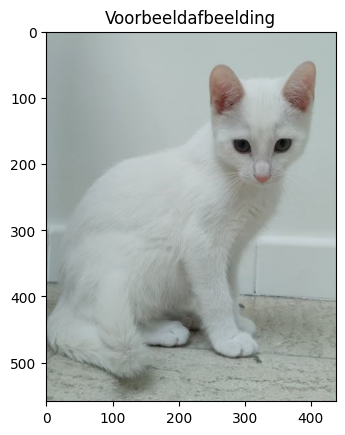

In [3]:
# functie geeft afbeelding weer
def plt_imshow(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

# Let op het pad!
kat = cv2.imread("../_afbeeldingen/kat.jpg") 
plt_imshow("Voorbeeldafbeelding", kat)

Voer het YOLO-algoritme uit op de afbeelding door de volgende code-cel uit te voeren:

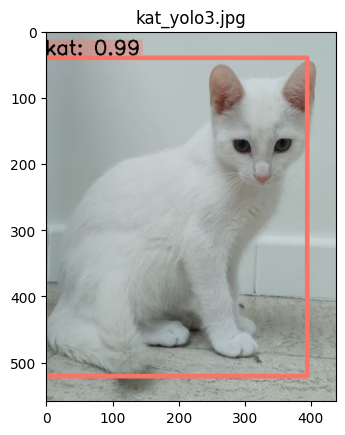

In [4]:
# Let op het pad!
yolo_verwerking("../_afbeeldingen/kat.jpg")

Je ziet dat de kat herkend wordt, want er is een selectiekader rond de kat getekend. Het getal dat erbij staat geeft aan hoe zeker het algoritme is van wat er op de afbeelding staat. In dit geval is het algoritme dus `99 % zeker dat het een kat is.`

<div style='margin-bottom:-35px;color: #690027;' markdown="1">
<h3>4.2 Oefening met YOLO</h3>
</div>

Het Yolo-algoritme kan dus reeds katten detecteren. Ook alle andere objecten in `coco.names` kan het herkennen.De vraag is hoe correct het dit kan doen. Vorige afbeelding was natuurlijk heel eenvoudig.

### Oefen mee 4.1
- Bekijk de afbeeldingen `hondkat.png` en `hondcake.png` in deze Notebook met behulp van de <a href="#plt_imshow">functie plt_imshow</a>. De afbeeldingen zijn terug te vinden in de map `_afbeeldingen`.

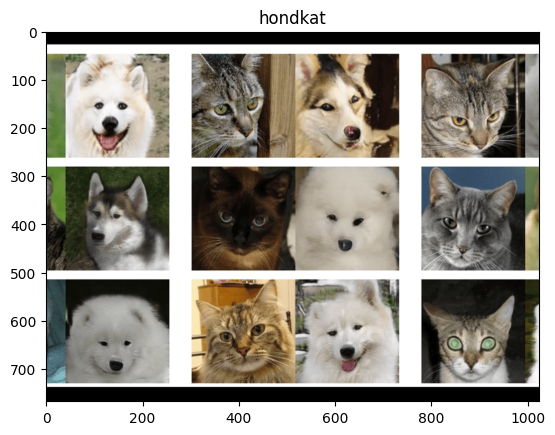

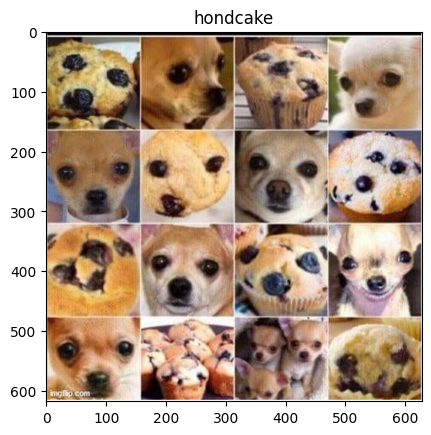

In [6]:
# Laat afbeelding hondkat.png en hondcake.png zien. Ze staan in de map _afbeeldingen.
# Maak hiervoor gebruik van de functie plt_imshow gegeven in 4.1.

# Afbeelding hondcake.png
hondkat = cv2.imread(r"C:\Users\Menno\OneDrive\Documenten\GitHub\6IICT_PROG4_oef\hfst_5_AI\_afbeeldingen\hondkat.png") 
hondcake = cv2.imread(r"C:\Users\Menno\OneDrive\Documenten\GitHub\6IICT_PROG4_oef\hfst_5_AI\_afbeeldingen\hondcake.png") 
plt_imshow("hondkat", hondkat)
plt_imshow("hondcake", hondcake)

-  Voer het YOLO-algoritme nu uit op beide afbeeldingen.

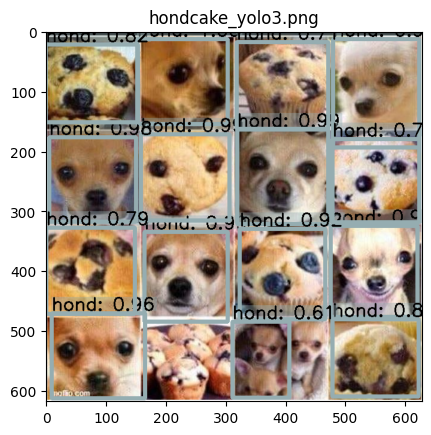

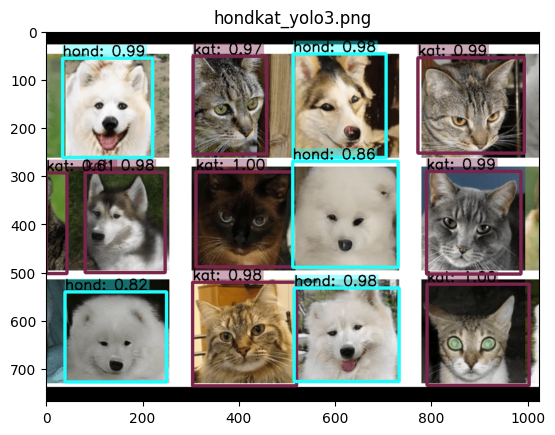

In [7]:
# Verwerk afbeeldingen hondkat en hondcake door YOLO
yolo_verwerking(r"C:\Users\Menno\OneDrive\Documenten\GitHub\6IICT_PROG4_oef\hfst_5_AI\_afbeeldingen\hondcake.png")
yolo_verwerking(r"C:\Users\Menno\OneDrive\Documenten\GitHub\6IICT_PROG4_oef\hfst_5_AI\_afbeeldingen\hondkat.png")

- Hoeveel dieren werden er juist gedetecteerd?

**Antwoord hondkat: veel**

**Antwoord hondcake:veel** 


- Werd er een dier fout gedetecteerd? Indien ja, hoe komt dit denk je?

**Antwoord hondkat:neen**

**Antwoord hondcake:ja** 


<div style='margin-bottom:-35px;color: #690027;' markdown="1">
<h2>5. Belang van een goede dataset</h2>
</div>

Een DL-model wordt getraind a.d.h.v. voorbeelden (ook wel een `dataset` genoemd). Een goede dataset bevat veel voorbeelden van alle zaken die het algoritme moet onderscheiden.

Stel dat je de `tomaten in je moestuin wilt herkennen`. Je neemt eerst heel wat foto's van tomaten. Waarna je deze foto's aan het model geeft, met op iedere afbeelding de label 'tomaat'. Het algoritme zoekt dan zelf kenmerken die op elke foto voorkomen, bijvoorbeeld dat de `tomaat rond is en rood`. Plots merk je dat je systeem compleet ontregeld is, blijkbaar waren kinderen met een `rode bal´ in het beeld van de camera aan het spelen...

Als een ander voorwerp sterk lijkt op hetgeen jij wilt detecteren, dan kan dat ertoe leiden dat het model fouten maakt. Hetzelfde gebeurde hierboven bij de afbeeldingen van **honden** en **cake**. Om dit te voorkomen, moet je altijd goed nadenken over welke objecten allemaal in jouw omgeving zullen voorkomen. Het algoritme moet getraind zijn om het verschil ertussen te zien!

### Oefen mee 5.1 
- Op basis van de YOLO-output van de afbeelding `hondcake.png`. welke kenmerken denk jij dat het model bij hond zou hebben geplaatst? Hoe kan hierdoor verwarring ontstaan met een cupcake?

**Antwoord:**





Voorwerpen die sterk op elkaar lijken is een probleem waar zelf de beste *machine learning* en *deep learning* algoritmes nog op vast lopen. Dit toont dan ook het nut aan van een **uitgebreide en gevarieerde dataset**. 

Nog een aantal voorbeelden van datasets waar veel algoritmes op vast lopen zijn. Alle voorbeelden uit deze Notebook zijn niet realistisch, maar duiden wel het gevaar aan van een beperkte dataset. beeld je eens in dat iets soortgelijks zou gebeuren met een zelfrijdende wagen?
<table><tr>
<td><figure>
  <img src="../_afbeeldingen/hondkip.jpg" alt="Trulli" width="200">
    <figcaption><center>Hond of crispy chicken</center></figcaption>
</figure></td>
<td><figure>
  <img src="../_afbeeldingen/hondmop.jpg" alt="Trulli" width="200">
    <figcaption><center>Hond of mop</center></figcaption>
</figure></td>
<td><figure>
  <img src="../_afbeeldingen/slotchocoladekoek.jpg" alt="Trulli" width="200">
    <figcaption><center>Chocoladekoek of luiaard</center></figcaption>
</figure></td>
<td><figure>
  <img src="../_afbeeldingen/corgibrood.png" alt="Trulli" width="200">
    <figcaption><center>Corgi of brood</center></figcaption>
</figure> </td>
</tr></table>

Omdat de objecten op deze figuren zo op elkaar gelijken, heeft het menselijk oog soms al problemen om de getoonde objecten van elkaar te onderscheiden. Om deze dan te gaan detecteren met een algoritme is nog veel moeilijker, mede omdat de computer niet naar de omgeving van het voorwerp kijkt, zoals wij wel doen.

### Oefen mee 5.2 (Extra)

Open het bestand detectie.py en ga naar de functie yolo_verwerking.<br> Analyseer deze. Welke onderdelen begrijp je wel? Welke niet?

**Antwoord:ik begrijp alles**

  <a href="https://www.aiopschool.be/dwengo/"> 
        <img src="../_afbeeldingen/bannerugentdwengo.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:20%"/>
    </a>

Deze Notebook is gebaseerd op: Notebook AI in de landbouw, zie <a href="http://www.aiopschool.be">AI Op School</a>, van M. Benoit, F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 